In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from pycocotools import mask as mask_utils


In [109]:
# image_path = r"D:\HUST\computer vision\data\matching aerial data\train\images"
# label_path = r"D:\HUST\computer vision\data\matching aerial data\train\annotation.json"

In [110]:
label_path = r"D:\HUST\computer vision\data\matching aerial data\val\annotation.json"

In [111]:
# len(os.listdir(image_path))

In [112]:
# images = []
# for i in range(5):
#     img_name = os.listdir(image_path)[i]
#     img_path = os.path.join(image_path, img_name)
#     images.append(img_path)

In [113]:
images = []
images.append('D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000029.jpg')
images.append('D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000030.jpg')
images.append('D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000031.jpg')
images.append('D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000032.jpg')

In [114]:
images

['D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000029.jpg',
 'D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000030.jpg',
 'D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000031.jpg',
 'D:\\HUST\\computer vision\\data\\matching aerial data\\val\\images\\000000000032.jpg']

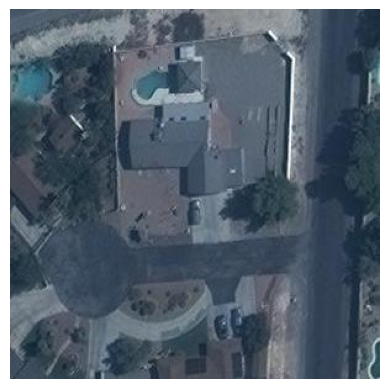

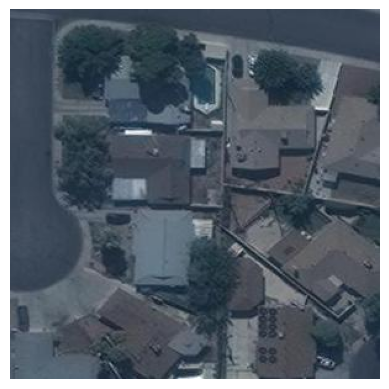

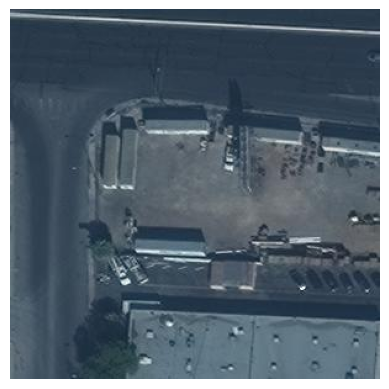

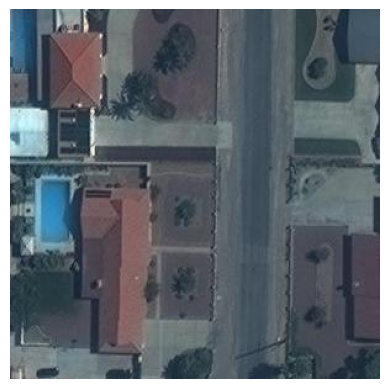

In [115]:
for img in images:
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [116]:
with open(label_path, "r") as file:
    labels_data = json.load(file)

In [117]:
labels_data.keys()

dict_keys(['info', 'categories', 'images', 'annotations'])

In [118]:
image_id = []
for image in images:
    for i in labels_data['images']:
        if i['file_name'] == os.path.basename(image):
            print(i)
            image_id.append(i['id'])
image_id

{'id': 29, 'file_name': '000000000029.jpg', 'width': 300, 'height': 300}
{'id': 30, 'file_name': '000000000030.jpg', 'width': 300, 'height': 300}
{'id': 31, 'file_name': '000000000031.jpg', 'width': 300, 'height': 300}
{'id': 32, 'file_name': '000000000032.jpg', 'width': 300, 'height': 300}


[29, 30, 31, 32]

In [119]:
annotations = [[] for _ in range(len(image_id))]

for ann in labels_data['annotations']:
    for id in range(len(image_id)):
        if ann['image_id'] == image_id[id]:
            annotations[id].append(ann)

len(annotations)

4

In [120]:
def get_bbox_from_segmentation(segmentation):
    segmentation = np.array(segmentation).reshape(-1, 2)  # Convert to Nx2 array
    x_min, y_min = segmentation.min(axis=0)
    x_max, y_max = segmentation.max(axis=0)
    width = x_max - x_min
    height = y_max - y_min
    return x_min, y_min, width, height # COCO format

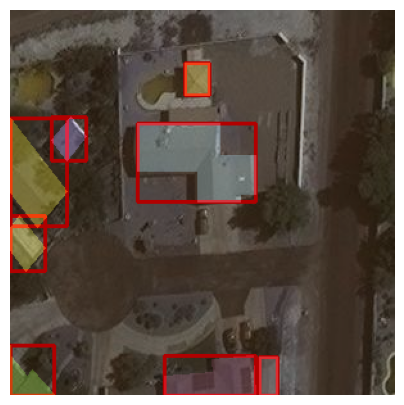

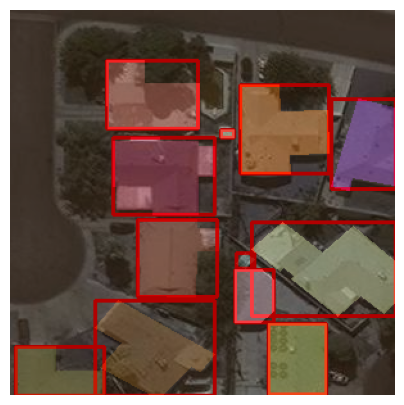

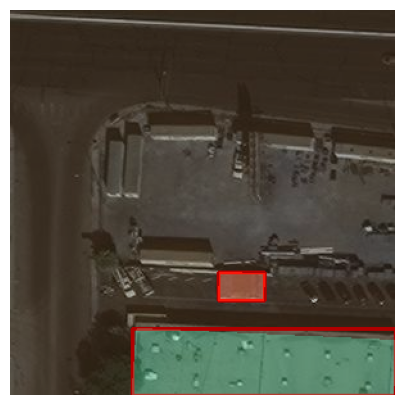

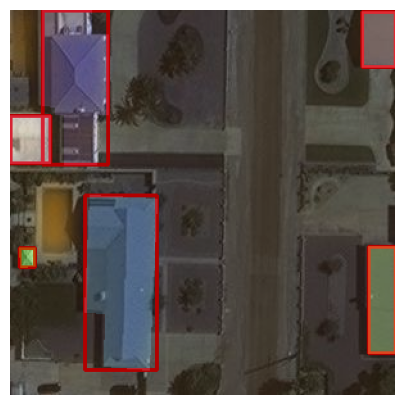

In [121]:
for id in range(len(image_id)):
    image_0 = cv2.imread(images[id])

    mask_overlay = np.zeros_like(image_0, dtype=np.uint8)  

    num_instances = len(annotations[id])
    colors = np.random.randint(0, 255, (num_instances, 3), dtype=np.uint8)  

    for i, ann in enumerate(annotations[id]):
        segmentation = ann['segmentation']

        if isinstance(segmentation, dict):  # **RLE Format**
            binary_mask = mask_utils.decode(segmentation)  # Decode RLE
        elif isinstance(segmentation, list):  # **Polygon Format**
            binary_mask = np.zeros(image_0.shape[:2], dtype=np.uint8)  
            for polygon in segmentation:
                poly_points = np.array(polygon, dtype=np.int32).reshape((-1, 2))

                if len(poly_points) > 2:  
                    cv2.fillPoly(binary_mask, [poly_points], 255)  
        else:
            raise ValueError("Unknown segmentation format!")

        mask_overlay[binary_mask>0] = colors[i] 

        x, y, w, h = get_bbox_from_segmentation(segmentation)
        x = int(x)
        y = int(y)  
        w = int(w)
        h = int(h)
        cv2.rectangle(image_0, (x, y), (x + w, y + h), (255, 0, 0), 2)

    overlay = cv2.addWeighted(image_0, 0.7, mask_overlay, 0.3, 0)  
    plt.figure(figsize=(5,5))
    plt.imshow(overlay)
    plt.axis("off")
    plt.show()
